# M4010, IUT Bordeaux, fonction linéaire avec Keras

Dans ce notebook, nous allons toucher à Kéras mais de manière douce. Nous ne verrons qu'un réseau de neurones limité à un seul neurone. Avec en plus une fonction d'activation linéaire.
Bref, nous allons étudier la fonction  𝑦=𝑤.𝑥+𝑏 , tout simplement, où  𝑤  est le poids du neurone.
L'objet de ce TD est de comprendre ce que fait la fonction fit de Keras.

#### 1. Création d'un jeu de données
Il faut d'abord créer les données et importer toutes les librairies. Vous allez donc voir les données que nous voulons apprende. Il s'agit pour l'instant simplement de la fonction linéaire  𝑦=7.𝑥+3 

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.callbacks import Callback

Using TensorFlow backend.


shape of datax's : (100, 1)
shape of datay's : (100, 1)


Text(0, 0.5, 'Y (real values)')

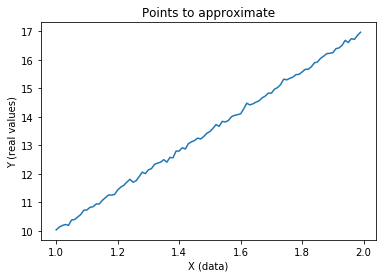

In [2]:
NBPOINTS = 100
# generate data
datax = np.array([(x / 100 + 1) for x in range(0, NBPOINTS)]).reshape(-1,1)
datay = datax * 7 + 3  # This applies on all the elements of the vector

# We add some noise to the perfect line
datay += np.random.normal(0, 0.05, NBPOINTS).reshape(100,1)

# We have a vector of inputs as x (the "data")... e.g. a vector of vectors (each input is a vector)
# We have a vector of outputs as y (the "function to learn") e.g. a vector of vectors of output (each output is also a vector of number)
print("shape of datax's :", datax.shape)
print("shape of datay's :", datay.shape)
plt.plot(datax, datay)
plt.title("Points to approximate")
plt.xlabel("X (data)"); plt.ylabel("Y (real values)")

### 2. Préparation du modèle en Keras
L'apprentissage peut se faire exemple après exemple, mais également par groupe d'exemples (des batchs). L'avantage de l'utilisation de batch est multiple : cela permet par exemple de trouver immédiatement comment faire évoluer le réseau de neurones pour un ensemble de points. Cela permet également de jouer sur la performance des CPU et des GPU à paralleliser du code concernant des opérations matricielles. En interne, cela ajoute une dimension à toutes les opérations : le réseau apprend en même temps avec plusieurs exemples à la fois.

Pour comprendre ce qui se fait en interne, nous allons utiliser une fonction callback qui sera appelée après chaque traitement de Batch et chaque find d'Epoch. La class History, dans la suite, permet de mémoriser tous les paramètres actuels du modèle qui est en train d'apprendre. Cela nous permettra de rejouer tout l'apprentissage plus tard.

** Vous devez passer un peu de temps sur les documentations Keras **

- Remplissez la méthode linear_model() de manière à renvoyer un réseau de neurones ayant un seul neurone.

- Utilisez la méthode compile(...) de Kéras pour préparer le réseau de neurones

    - L'activation doit être linéaire

    - Vous devez spécifier la valeur de input_dim

    - Ajoutez l'initialisation aléatoire des poids dans le réseau

- La fonction getwb(layer) permet de récupérer les valeurs des poids et biais d'une couche de neurones. Dans notre cas, cela permet de retourner w et b dans l'équation y=w.x+b

In [3]:
MAXEPOCHS = 200
cmap = matplotlib.cm.get_cmap('magma')

def getwb(layer):
    [tmpw, tmpb] = layer.get_weights()
    return (tmpw[0][0], tmpb[0])

# Function that will be called after each epoch
# I use this function to memorize everything that happened during learning
class History(Callback):
    def __init__(self):
        self.history = {}
        self.batchHistory = []
    def addkeyvalue(self, k, v):
        if not k in self.history: self.history[k] = []
        self.history[k].append(v)
    def on_epoch_end(self, epoch, logs={}):                                                                                 
        for k,v in logs.items():
            self.addkeyvalue(k,v)
        # Here, we get the values of the unique neuron: its weights and its bias
        (w,b) = getwb(self.model)
        self.addkeyvalue('w',w); self.addkeyvalue('b',b)
        print(".",end="")
    def on_batch_end(self, batch, logs={}):
        self.batchHistory.append(getwb(self.model))
        
       
#Define the model: Just one neuron!!
def linear_model():
   model = Sequential()
   model.add(Dense(1, 
                   activation = 'linear', 
                   kernel_initializer='uniform', 
                   input_dim = 1))
   model.summary()

   model.compile(optimizer = optimizers.RMSprop(learning_rate=0.1), 
                 loss = 'mean_squared_error', 
                 metrics = ['mae'])
   
   return model

print("Model defined")

Model defined


### 3. Utilisation de la méthode fit
Utilisez la méthode fit pour lancer l'apprentissage.
- Utilisez la constante MAXEPOCHS pour limiter le nombre d'epochs de l'apprentissage
- Utilisez un batch_size de 1
- Précisez bien la fonction callback callbacks=history

In [4]:
# Cell that do the learning

model = linear_model()

history=[History()]

print("Values of the neuron before learning :", getwb(model))

model.fit(datax, datay, 
         epochs = MAXEPOCHS, 
         batch_size = 10, 
         callbacks = history,
         validation_split=0.33,
         verbose=0)

print("Values of the neuron after learning :", getwb(model))


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Values of the neuron before learning : (0.047118876, 0.0)
........................................................................................................................................................................................................Values of the neuron after learning : (6.8831754, 3.030979)


### 4 Essayez différentes techniques
Utilisez toutes les cellules ci-dessous pour visualiser comment le réseau converge et apprend.
- Notez à quelle vitesse les valeurs w et b convergent vite
- Notez également à quel moment les valeurs se stabilisent

Différentes techniques à essayer
- quel impact a le learning rate (essayez 0.1, 0.3, 0.05, ...) sur les figures ci-dessous ?
- quel impact a le batch_size sur le temps et les figures ?

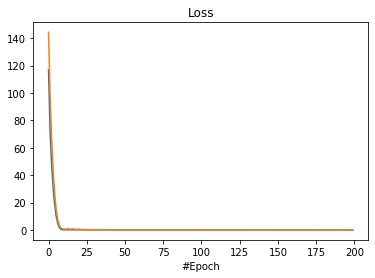

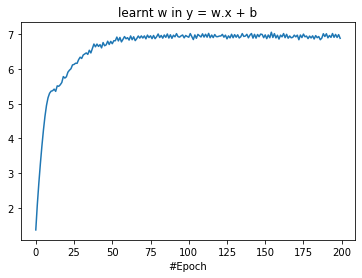

In [6]:
n = 0
plt.figure(n); n+=1
plt.title("Evolution of the learnt curve")
plt.xlabel("x")
plt.xlabel("y")
wtmp = history[0].history['w']
btmp = history[0].history['b']
for i, w in enumerate(wtmp):
    out = datax * w + btmp[i] # Gives what the model predicted for all outputs at epoch i
    # in fact this is exactly what model.predict(datax) would have given us after this epoch
    plt.plot(datax, out, color=cmap(i/MAXEPOCHS))
plt.plot(datax,datay,'k') # Plots the initial data
 
#Use the model


#plt.figure(n); n+=1
#plt.title("Mean Absolute Error")
#plt.xlabel("#Epoch")
#plt.plot(history[0].history['mean_absolute_error'])

plt.figure(n); n+=1
plt.title("Loss")
plt.xlabel("#Epoch")
plt.plot(history[0].history['loss'])
plt.plot(history[0].history['val_loss'])

plt.figure(n); n+=1
plt.title("learnt w in y = w.x + b")
plt.xlabel("#Epoch")
plt.plot(history[0].history['w'])

plt.figure(n); n+=1
plt.title("learnt b in y = w.x + b")
plt.xlabel("#Epoch")
plt.plot(history[0].history['b'])

### Affichage simple de l'équation apprise

In [7]:
[w,a] = model.get_weights()
print("y={}.x + {}".format(w[0][0], a[0]))

y=6.883175373077393.x + 3.0309789180755615


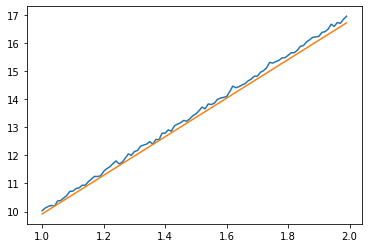

In [8]:
def predict(x):
    return w*x +a

plt.plot(datax, datay)
y_pred = predict(datax)
plt.plot(datax,y_pred)

## Exercice.

Essayer differents optimizers pour voir si on peut apprendre mieux ou plus vite cette equation lineaire.
https://keras.io/optimizers/